## Student Detials
> Title= "Mr"\
> Name= "Ali Nawaz"\
> email = "nawazktk99@gmail.com"\
> whatsapp = "03358043653"

### In this Notebook we are going to know about Decision Tree Classifier using Sci-kit algorithm

## Decision Tree Algorithm
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

![Diagram Decsion Tree](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png)

### How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

Select the best attribute using Attribute Selection Measures(ASM) to split the records.
Make that attribute a decision node and breaks the dataset into smaller subsets.
Starts tree building by repeating this process recursively for each child until one of the condition will match:
All the tuples belong to the same attribute value.
There are no more remaining attributes.
There are no more instances.

![How Decsion Trree works](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/2_btay8n.png)

### Entropy
**Definition:** Entropy provides an absolute limit on the shortest possible average length of a lossless compression encoding of the data produced by a source, and if the entropy of the source is less than the channel capacity of the communication channel,the data generated by the source can be reliably communicated to the receiver.
The definition is extremely difficult to understand, and it is not necessarily pertinent to our discussions of decision trees. Shannon(1948) used the concept of entropy for the theory of communication, to determine how to send encoded (bits) information from a sender to a receiver without loss of information and with the minimum amount of bits.

> High Entropy : More uncertainty\
> Low Entropy : More Predictability

## Information Gain
Now that we have discussed Entropy we can move forward into information gain. This is the concept of a decrease in entropy after splitting the data on a feature. The greater the information gain, the greater the decrease in entropy or uncertainty.


![image](https://miro.medium.com/max/470/1*ixgJCZRgq9v0AOKJro-3Iw.png)


**T:** Target population prior to the split T=∑ {All Splits}, the total number of observation before splitting.

**Entropy(T):** Measure the disorder before the split,or level of uncertainty

**s{i}:** is the number of observations on the i{th} split

**Entropy(s{i}):** Measures the disorder for the target variable on split s{i}

### For More Information visit ([More Details](https://www.datacamp.com/community/tutorials/decision-tree-classification-python))

# If and Else Statement in Decsion Tree Classifier

In [7]:
# import all the lib
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# read the dataset using pandas
df = pd.read_csv('D:/Python ka Chilla/python_chilla/data/mldata.csv')
# df = sns.load_dataset('iris')


In [8]:
df.head()

,age,weight,gender,height,likeness
0,27,76.0,1,170.688,Biryani
1,41,70.0,1,165.000,Biryani
2,29,80.0,1,171.000,Biryani
3,27,102.0,1,173.000,Biryani
4,29,67.0,1,164.000,Biryani


In [ ]:
def entropy(col,df,option=2):
# Takes the column number and data frame as an input
    #Grabs the column we specify and the last column (which we assume is the decision col)
    new_df=df.iloc[:,[col,len(df.columns)-1]]
    #rename the columns
    new_df.columns=('col1','col2')
    #return the unique values in this feature along with their counts
    names,count=np.unique(new_df.col1,return_counts=True)
    
    
    #create an empty list
    entropy_list=list()
    
    #for loop on each split to get the entry at the split
    for i in range(0,(len(names))):
            if(option==2):
                dff=new_df[new_df.col1==names[i]]
                entropy_list.append(count[i])
                entropy_list.append(names[i])
            else:
                dff=new_df
            den=len(dff)
            columns=new_df.col2.unique()
            p1 = dff.col2.eq(columns[0]).sum()/den
            p2 = dff.col2.eq(columns[1]).sum()/den
            P=[p1,p2]
            ent=0
            k=0
            for p in P:
                k=k+1
                ent += -p * math.log(p,2)
                if(k==len(P)):
                    entropy_list.append(ent)
    return entropy_list
import numpy as np
import math

print("Entropy for Emotion Split",entropy(0,df)[1:3])
print("Confirm",-(3/5)*math.log((3/5),2)-(2/5)*math.log((2/5),2),"\n")
print("Entropy for Emotion Split",entropy(0,df)[4:6])
print("Confirm",-(1/3)*math.log((1/3),2)-(2/3)*math.log((2/3),2))

# Feature Selection

In [9]:
 #split dataset in features and target variable
df['gender'] = df['gender'].replace('Male',  1) 
df['gender'] = df['gender'].replace('Female',  0) 
feature_cols = ['age', 'gender', 'weight']
X = df[feature_cols] # Features
y = df.likeness # Target variable

In [10]:
df['likeness'].value_counts()

Biryani    165
Samosa      46
Pakora      34
Name: likeness, dtype: int64

# Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.


In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6081081081081081


## Assignments for Decsion Tree

# 1. Decision Tree Model Saving
Let's Save a Decision Tree Model

In [15]:
import pickle
import joblib
filename = 'finalized_model_descsion_tree.joblib'
joblib.dump(clf, filename)

['finalized_model_descsion_tree.joblib']

In [16]:
# using pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 


# 2. Decision Tree Model Loading
Let's load the saved a Decision Tree Model using pickle.

In [17]:
# using job lib
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.6081081081081081


In [18]:
# using pickle
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6081081081081081


## 3. Visalize the Tree of Our Model

In [22]:
from sklearn import tree
# tree.plot_tree(clf);

In [ ]:
fn=['age', 'gender', 'weight']
cn=['age', 'gender', 'weight']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('descion_tree.png')

In [30]:
tree.export_graphviz(clf, out_file='tree.dot')

## 4. Visalize the Tree and Show Image in HD

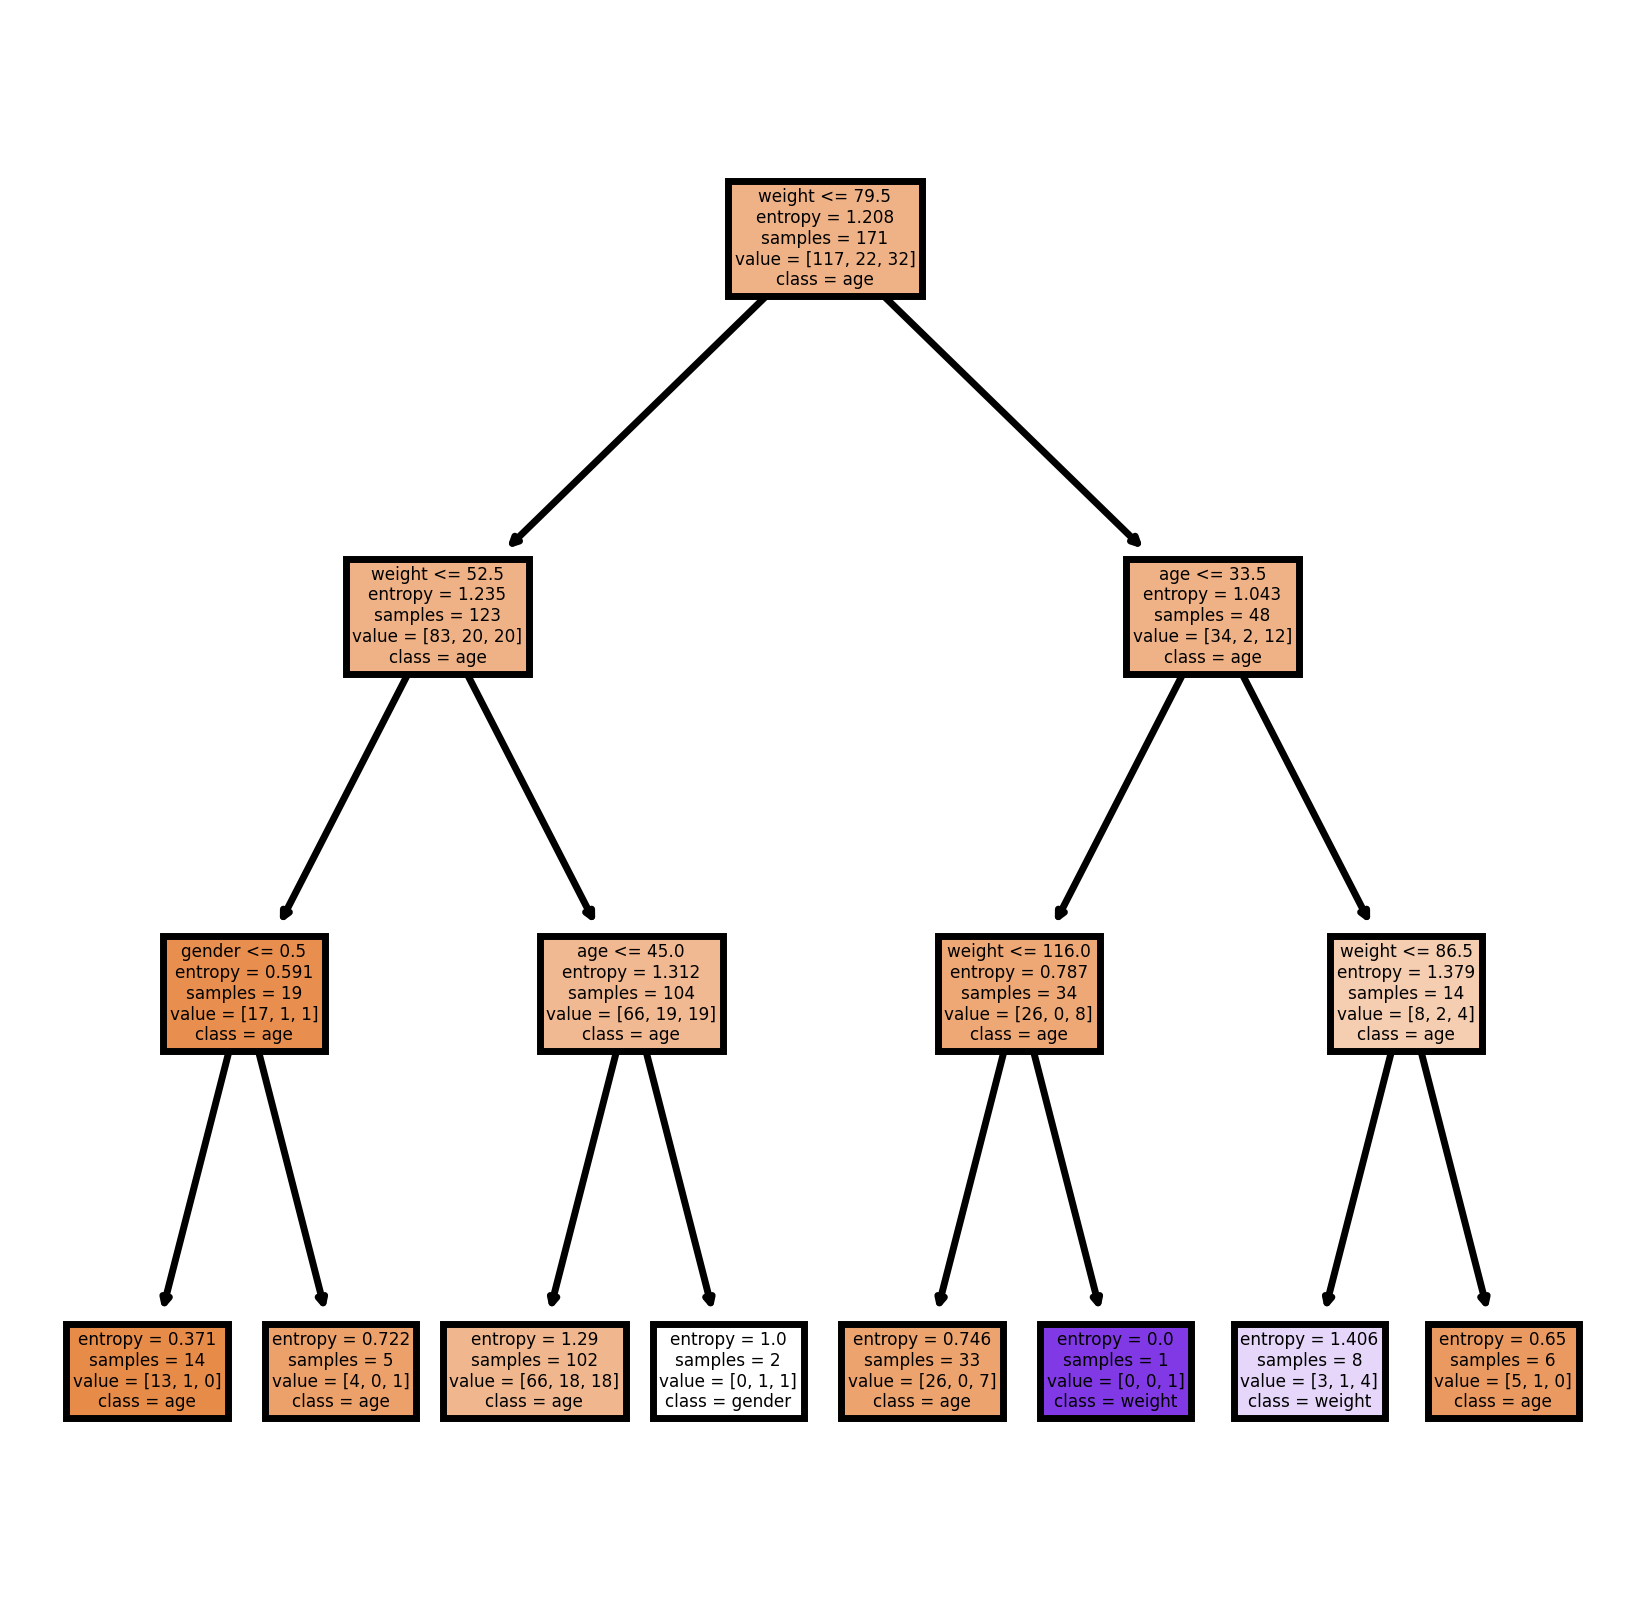

In [32]:
fn=['age', 'gender', 'weight']
cn=['age', 'gender', 'weight']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('descion_tree.png')